In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def classif(estimator, x, y):
    y_pred = estimator.predict(x)
    print(classification_report(y, y_pred, labels=[1,0]))

In [64]:
# import dataset
email = pd.read_csv('emails.csv')
email.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [65]:
X = email['text']
y = email['spam']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [67]:
vector = CountVectorizer(max_df=0.5, max_features=100, stop_words='english', lowercase= True)
X_train_vec = pd.DataFrame(vector.fit_transform(X_train).toarray(), columns=vector.get_feature_names_out())

In [68]:
X_train_vec.shape

(4582, 100)

In [69]:
X_train_vec.head()

,00,000,01,02,03,04,05,07,08,09,10,11,12,15,19,20,2000,2001,30,713,available,best,business,cc,com,communications,company,conference,contact,corp,crenshaw,day,development,ect,edu,ees,email,energy,enron,fax,finance,following,forward,forwarded,free,gas,good,group,help,hou,houston,http,information,interview,john,just,kaminski,know,let,like,list,look,mail,make,management,market,meeting,message,model,need,new,people,phone,pm,power,price,program,project,regards,research,risk,send,sent,shall,shirley,stinson,th,thank,thanks,think,time,university,use,vince,visit,want,week,work,www,year
0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,2,1,3,0,2,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,0,0,0,0,1,1,0,0,3,0,3,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,5,0,0,0,0,1,0,4,0,0,0,1,1,0,5,4,0,0,0,1,3,1,0,0,0,1,0,0,0,0,8,1,0,0,0,8,0,0,0,0,2,0,0,0,0,0,5,0,0,1,0,0,0,4,1,1,0,0,0,0,0,0,0,5,1,0,1,1,2,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,3,1,0,0,0,8,0,1,0,0,0,0


In [70]:
# fit with MultinomialNB class prior 0.9, 0.1
nb = MultinomialNB(class_prior=[0.9,0.1], alpha=1)
nb.fit(X_train_vec, y_train)

MultinomialNB(alpha=1, class_prior=[0.9, 0.1])

In [71]:
classif(nb, X_train_vec, y_train)

              precision    recall  f1-score   support

           1       0.85      0.82      0.84      1094
           0       0.95      0.96      0.95      3488

    accuracy                           0.92      4582
   macro avg       0.90      0.89      0.89      4582
weighted avg       0.92      0.92      0.92      4582



In [72]:
X_test_vec = pd.DataFrame(vector.transform(X_test).toarray(), columns=vector.get_feature_names_out())

In [73]:
classif(nb, X_test_vec, y_test)

              precision    recall  f1-score   support

           1       0.81      0.78      0.80       274
           0       0.93      0.94      0.94       872

    accuracy                           0.90      1146
   macro avg       0.87      0.86      0.87      1146
weighted avg       0.90      0.90      0.90      1146



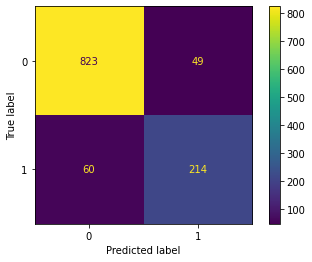

In [96]:
y_pred = nb.predict(X_test_vec)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.show()

**HYPERPARAMETER TUNNING**

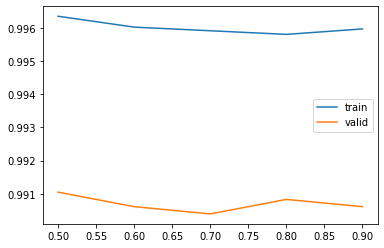

In [74]:
par = np.arange(0.5,1,0.1)
train = []
valid = []
depths = []
for x in par:
    pipeline = make_pipeline(CountVectorizer(max_df= x),
                             MultinomialNB())
    result = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=5,
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    depths.append(x)
    
sns.lineplot(x = depths, y=train, label='train')
sns.lineplot(x = depths, y=valid, label='valid')
plt.show()

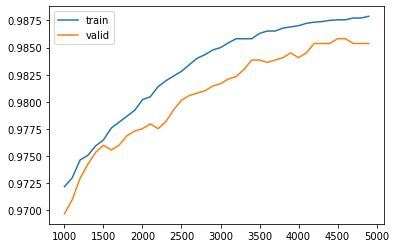

In [75]:
par = np.arange(1000,5000,100)
train = []
valid = []
depths = []
for x in par:
    pipeline = make_pipeline(CountVectorizer(max_df= 0.8,
                                            max_features=x),
                             MultinomialNB())
    result = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=5,
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    depths.append(x)
    
sns.lineplot(x = depths, y=train, label='train')
sns.lineplot(x = depths, y=valid, label='valid')
plt.show()

max_feature = will select most word/feature which occur most frequently 

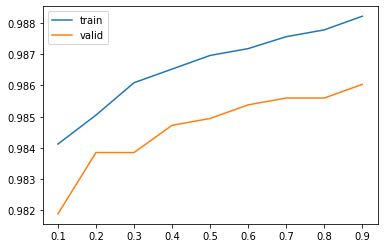

In [76]:
par = np.arange(0.1,1,0.1)
train = []
valid = []
depths = []
for x in par:
    pipeline = make_pipeline(CountVectorizer(max_df= 0.8,
                                            max_features=4500),
                             MultinomialNB(alpha=1,
                                          class_prior=[x,1-x]))
    result = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=5,
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    depths.append(x)
    
sns.lineplot(x = depths, y=train, label='train')
sns.lineplot(x = depths, y=valid, label='valid')
plt.show()

In [77]:
np.random.seed(42)

**Hyperparameter Tunning**

In [78]:
pipeline.steps

[('countvectorizer', CountVectorizer(max_df=0.8, max_features=4500)),
 ('multinomialnb',
  MultinomialNB(alpha=1, class_prior=[0.9, 0.09999999999999998]))]

In [79]:
pipeline = make_pipeline(CountVectorizer(max_df= 0.8,
                                            max_features=4500),
                 
                         MultinomialNB(alpha=1,
                                          class_prior=[0.9,0.1]))

In [80]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.8, max_features=4500)),
                ('multinomialnb',
                 MultinomialNB(alpha=1, class_prior=[0.9, 0.1]))])

In [81]:
classif(pipeline, X_train, y_train)

              precision    recall  f1-score   support

           1       0.96      0.99      0.98      1094
           0       1.00      0.99      0.99      3488

    accuracy                           0.99      4582
   macro avg       0.98      0.99      0.98      4582
weighted avg       0.99      0.99      0.99      4582



In [82]:
classif(pipeline, X_test, y_test)

              precision    recall  f1-score   support

           1       0.94      0.99      0.97       274
           0       1.00      0.98      0.99       872

    accuracy                           0.98      1146
   macro avg       0.97      0.99      0.98      1146
weighted avg       0.98      0.98      0.98      1146



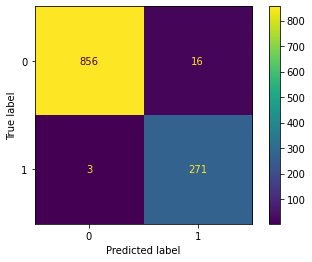

In [94]:
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipeline.classes_)
disp.plot()
plt.show()

**Word Cloud**

In [89]:
STOPWORDS.add('Subject')
STOPWORDS.add('Kaminski')
STOPWORDS.add('Vince')
STOPWORDS.add('ect')
STOPWORDS.add('Hou')
def word_cloud(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # convert to string and split the value 
        val = str(val) 
        tokens = val.split() 

        # convert each token to lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

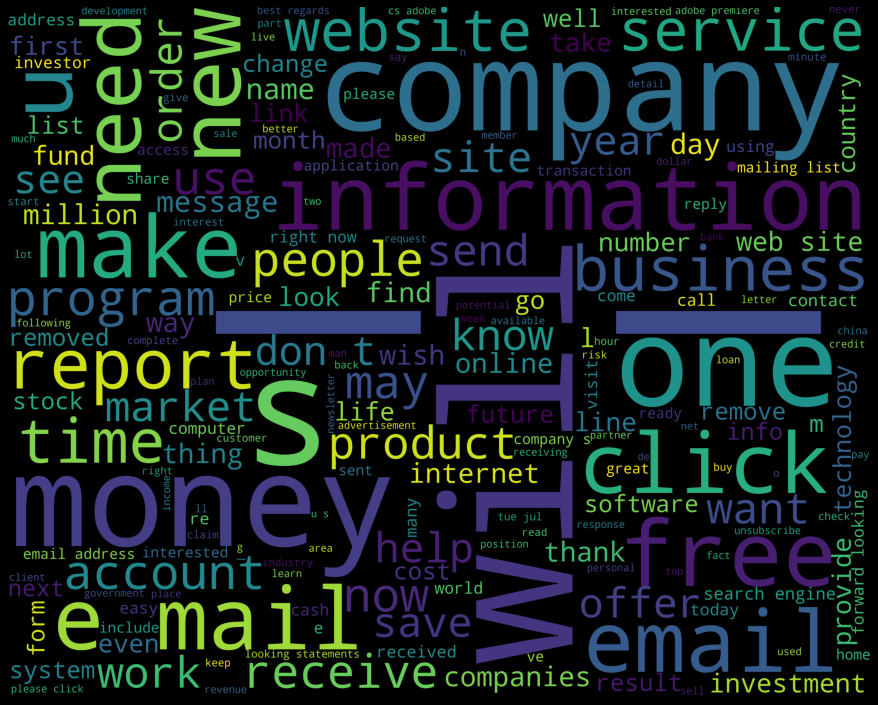

In [84]:
spam = email[email['spam'] == 1].text.values
word_cloud(spam)

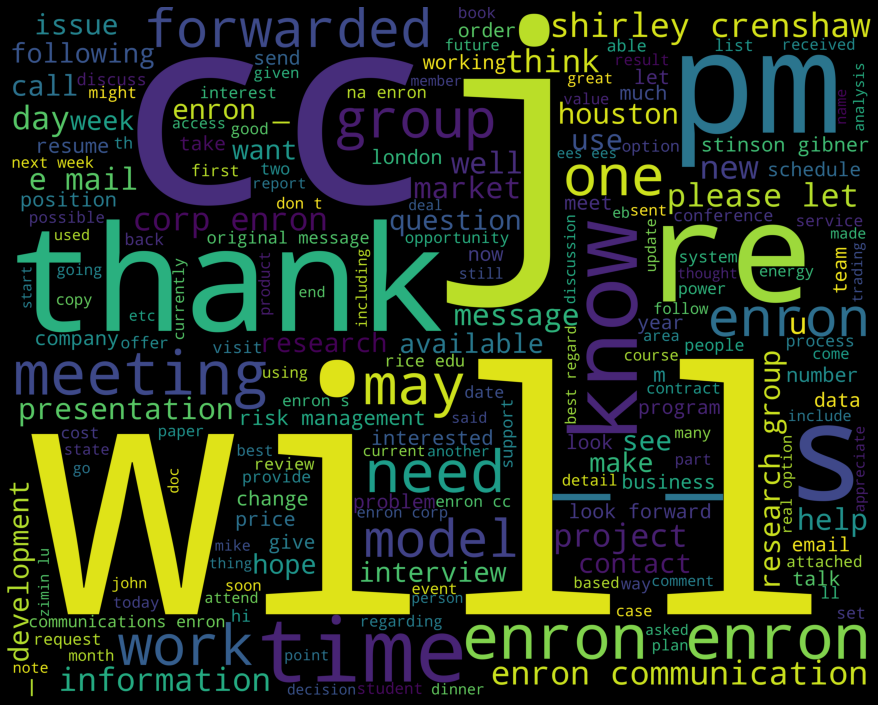

In [90]:
non_spam = email[email['spam'] == 0].text.values
word_cloud(non_spam)